# Early stopping

In [1]:
from sklearn.datasets import make_moons
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

2025-03-10 17:41:20.692632: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-10 17:41:20.704232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741624880.715923 1036790 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741624880.719744 1036790 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 17:41:20.733234: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Dataset creation

In [4]:
# Dataset generation
X, y = make_moons(n_samples=100, noise=0.3, random_state=0)

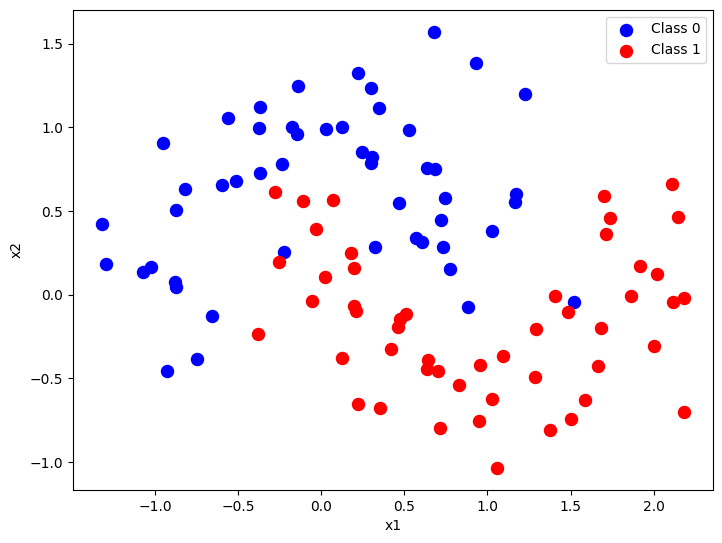

In [5]:
x1 = X[:,0]
x2 = X[:,1]

zero_class = (y ==0)
one_class =  (y==1)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])
ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Class 0')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Class 1')
ax_admission.set_xlabel('x1')
ax_admission.set_ylabel('x2')
ax_admission.legend(loc=1,numpoints=1)

In [6]:
# Training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)

## Neural network training and testing

In [7]:
# Neural network

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/sam/howest/howest-dl/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741624914.608797 1036790 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3574 MB memory:  -> device: 0, name: NVIDIA RTX A3000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
# Training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000


I0000 00:00:1741624919.075915 1037208 service.cc:148] XLA service 0x7f037800b7c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741624919.075990 1037208 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A3000 Laptop GPU, Compute Capability 8.6
2025-03-10 17:41:59.112747: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741624919.271058 1037208 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-10 17:42:00.209532: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_417', 8 bytes spill stores, 8 bytes spill loads

2025-03-10 17:42:00.360543: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_161', 340 byte

1/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.0938 - loss: 0.7034

I0000 00:00:1741624921.031537 1037208 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-03-10 17:42:01.857805: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_161', 184 bytes spill stores, 184 bytes spill loads



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.3247 - loss: 0.6921

2025-03-10 17:42:03.428464: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_29', 340 bytes spill stores, 340 bytes spill loads



3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3542 - loss: 0.6904 - val_accuracy: 0.7333 - val_loss: 0.6391
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7770 - loss: 0.6013 - val_accuracy: 0.7667 - val_loss: 0.5827
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7757 - loss: 0.5411 - val_accuracy: 0.8000 - val_loss: 0.5190
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7913 - loss: 0.4722 - val_accuracy: 0.8000 - val_loss: 0.4618
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7945 - loss: 0.4179 - val_accuracy: 0.8000 - val_loss: 0.4055
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8173 - loss: 0.3658 - val_accuracy: 0.8667 - val_loss: 0.3595
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8160 - loss: 0.3622 - val_accuracy: 0.8667 - val_loss: 0.3359
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8615 - loss: 0.3357 - val_accuracy: 0.8333 - val_loss: 0.3232

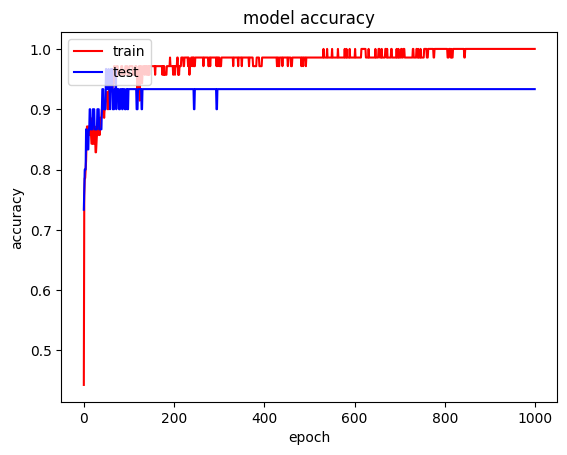

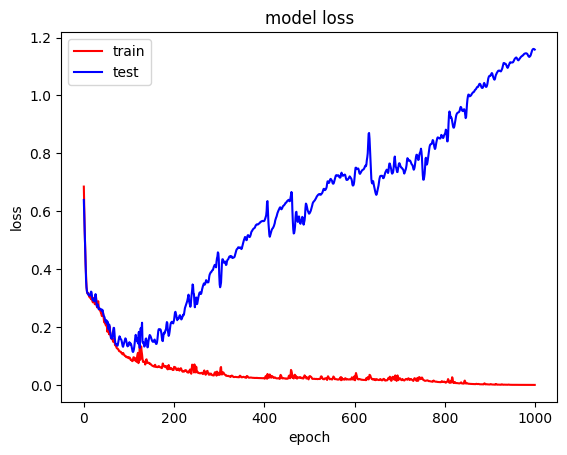

In [9]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping

In [10]:
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Neural network with early stopping

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,verbose=1,callbacks=[es])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.8134 - loss: 0.6738 - val_accuracy: 0.8000 - val_loss: 0.6171
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7906 - loss: 0.5932 - val_accuracy: 0.8000 - val_loss: 0.5515
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8180 - loss: 0.5136 - val_accuracy: 0.8333 - val_loss: 0.4809
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8056 - loss: 0.4537 - val_accuracy: 0.8667 - val_loss: 0.4175
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8401 - loss: 0.3979 - val_accuracy: 0.8667 - val_loss: 0.3721
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7821 - loss: 0.3885 - val_accuracy: 0.8667 - val_loss: 0.3422
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8095 - loss: 0.3669 - val_accuracy: 0.8667 - val_loss: 0.3266
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8472 - loss: 0.3247 - val_accuracy: 0.8333 - 

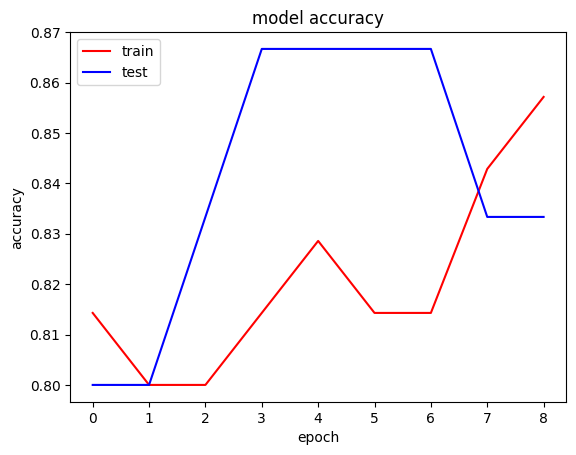

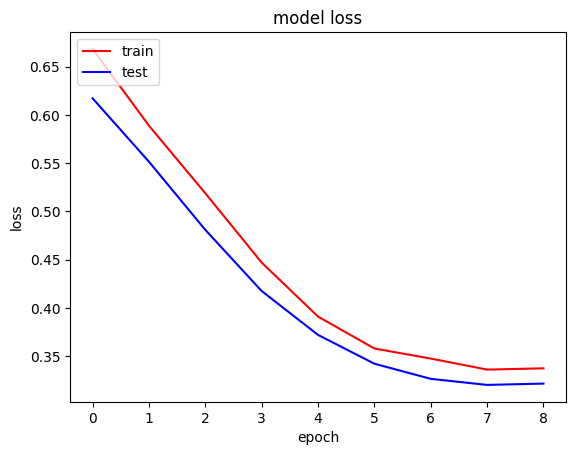

In [11]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping with patience

In [10]:
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 20)

# Neural netwok with early stopping

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,verbose=1,callbacks=[es])

Epoch 1/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6754 - accuracy: 0.6000 - val_loss: 0.6255 - val_accuracy: 0.8000
Epoch 2/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.5890 - accuracy: 0.8000 - val_loss: 0.5615 - val_accuracy: 0.8333
Epoch 3/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.5200 - accuracy: 0.8143 - val_loss: 0.4968 - val_accuracy: 0.8667
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.4564 - accuracy: 0.8429 - val_loss: 0.4353 - val_accuracy: 0.8667
Epoch 5/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.8286 - val_loss: 0.3862 - val_accuracy: 0.8667
Epoch 6/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3581 - accuracy: 0.8429 - val_loss: 0.3485 - val_accuracy: 0.8667
Epoch 7/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3360 - accuracy: 0.8429 - val_loss: 0.3261 - val_accuracy: 0.8667
Epoch 8/1000
3/3 [=

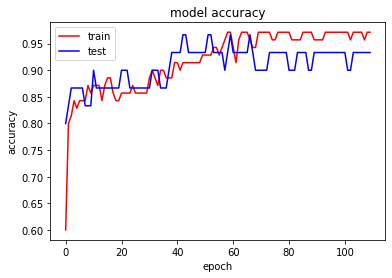

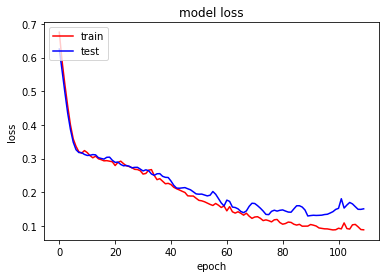

In [11]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping with patience and Modelcheckpoint saving

In [12]:
# Model checkpoint

#mc = ModelCheckpoint(best_model.accuracyitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

checkpoint_filepath = './bestmodel'



mc = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,save_weights_only=True, monitor='val_accuracy',mode='max',save_best_only=True)

# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 20)

# Neural network with early stopping

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

story = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200,verbose=1,callbacks=[es,mc])

Epoch 1/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6743 - accuracy: 0.6143 - val_loss: 0.6238 - val_accuracy: 0.8000
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 0.5825 - accuracy: 0.7857 - val_loss: 0.5594 - val_accuracy: 0.8000
Epoch 3/200
3/3 [==============================] - 0s 6ms/step - loss: 0.5133 - accuracy: 0.8000 - val_loss: 0.4928 - val_accuracy: 0.8000
Epoch 4/200
3/3 [==============================] - 0s 9ms/step - loss: 0.4495 - accuracy: 0.8143 - val_loss: 0.4267 - val_accuracy: 0.8667
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3932 - accuracy: 0.8143 - val_loss: 0.3738 - val_accuracy: 0.8667
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 0.3529 - accuracy: 0.8429 - val_loss: 0.3456 - val_accuracy: 0.8667
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.8571 - val_loss: 0.3408 - val_accuracy: 0.8333
Epoch 8/200
3/3 [=========

In [13]:
# Loading the the best performing model
model.load_weights(checkpoint_filepath)

# Testing the best performing model
y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 




Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[15  1]
 [ 0 14]]
96.66666666666667
